In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/amazon_sales_dataset.csv')  # e.g., '/content/amazon_sales_data.csv'
df.head()  # shows first 5 rows

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64


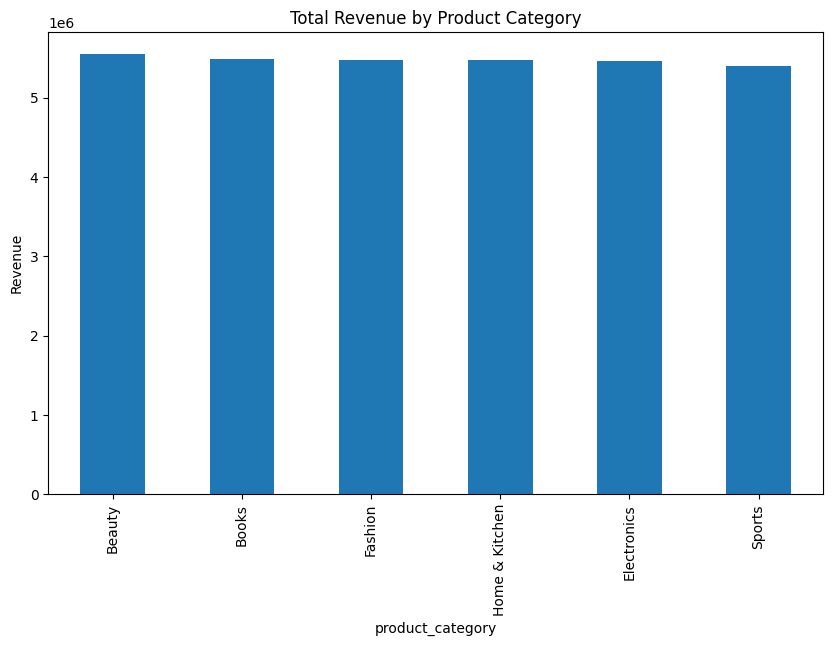

In [ ]:
category_revenue = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)
print(category_revenue)

# Quick bar chart
category_revenue.plot(kind='bar', figsize=(10,6))
plt.title('Total Revenue by Product Category')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Missing values
print("Missing values per column:")
print(df.isnull().sum())

# Duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# If duplicates exist, drop them (optional but clean)
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Missing values per column:
order_id            0
order_date          0
product_id          0
product_category    0
price               0
discount_percent    0
quantity_sold       0
customer_region     0
payment_method      0
rating              0
review_count        0
discounted_price    0
total_revenue       0
dtype: int64

Number of duplicate rows: 0
Shape after dropping duplicates: (50000, 13)


In [ ]:
# Ensure numeric columns are correct (in case any weird strings)
numeric_cols = ['price', 'discount_percent', 'discounted_price', 'quantity_sold', 'total_revenue', 'rating', 'review_count']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Convert 'order_date' to datetime format
df['order_date'] = pd.to_datetime(df['order_date'])

# Extract useful date parts
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df['month_name'] = df['order_date'].dt.month_name()
df['day_of_week'] = df['order_date'].dt.day_name()

# Discount amount and % impact
df['discount_amount'] = df['price'] - df['discounted_price']
df['discount_tier'] = pd.cut(df['discount_percent'], bins=[0, 10, 20, 30, 100], labels=['0-10%', '10-20%', '20-30%', '>30%'])

print("New columns added. Here's a sample:")
df[['order_date', 'month_name', 'day_of_week', 'discount_tier', 'discount_amount']].head()

New columns added. Here's a sample:


,order_date,month_name,day_of_week,discount_tier,discount_amount
0,2022-04-13,April,Wednesday,0-10%,12.87
1,2023-03-12,March,Sunday,10-20%,60.52
2,2022-09-28,September,Wednesday,10-20%,99.16
3,2022-04-17,April,Sunday,10-20%,55.79
4,2022-03-13,March,Sunday,NaN,0.00


Total Revenue: ₹32,866,573.74
Average Order Value: ₹657.33

Top 10 Categories by Revenue:
 product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64


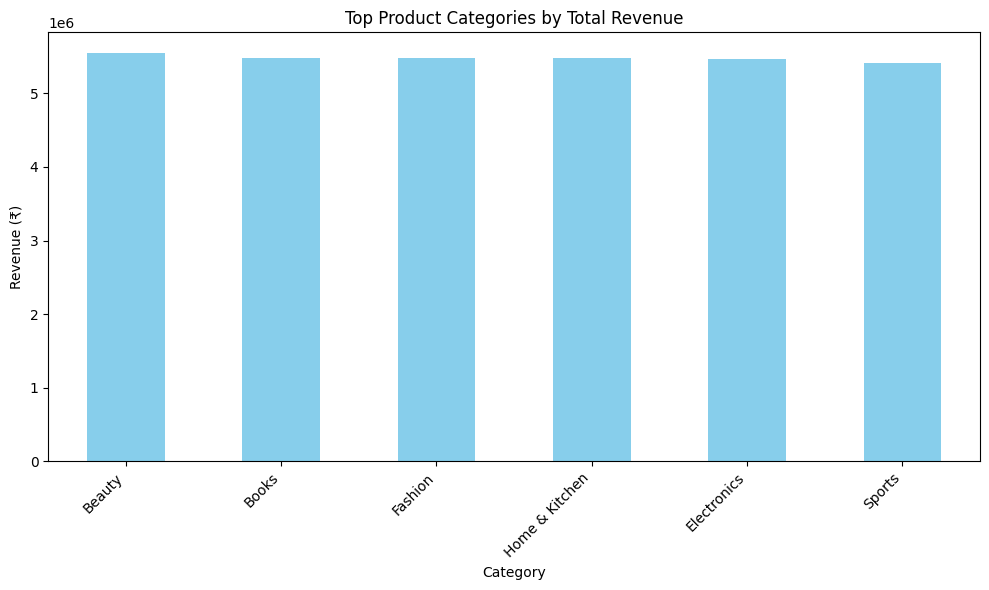

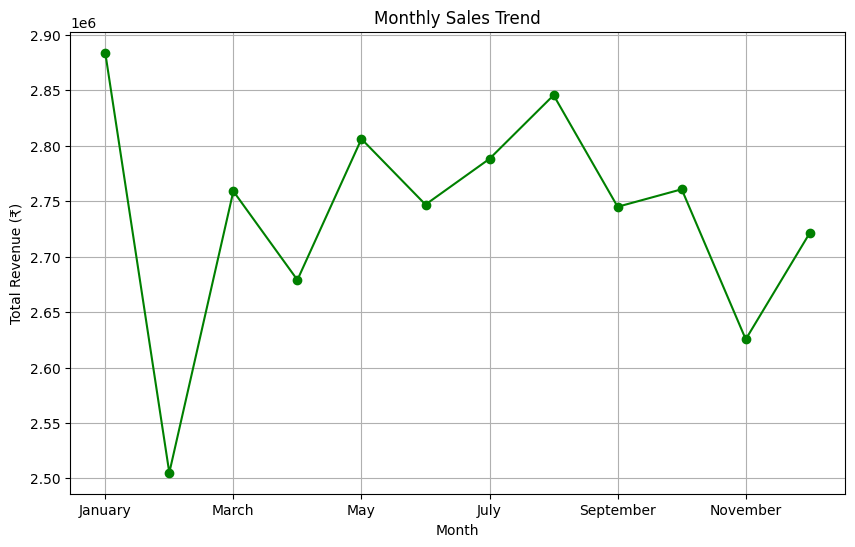

In [ ]:
# 1. Total revenue
total_revenue = df['total_revenue'].sum()
print(f"Total Revenue: ₹{total_revenue:,.2f}")

# 2. Average order value (AOV)
aov = df.groupby('order_id')['total_revenue'].sum().mean()  # if multiple items per order
print(f"Average Order Value: ₹{aov:,.2f}")

# 3. Top categories by revenue
top_categories = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Categories by Revenue:\n", top_categories)

# Visualize top categories
top_categories.plot(kind='bar', figsize=(10,6), color='skyblue')
plt.title('Top Product Categories by Total Revenue')
plt.ylabel('Revenue (₹)')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Sales by month
monthly_sales = df.groupby('month_name')['total_revenue'].sum().reindex(
    ['January','February','March','April','May','June','July','August','September','October','November','December']
)
monthly_sales.plot(kind='line', marker='o', figsize=(10,6), color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Total Revenue (₹)')
plt.xlabel('Month')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is already loaded and order_date is datetime
# If not, re-run your load + fix cells first
print(df.shape)  # should be around (50000, 13+)

(50000, 19)


In [ ]:
total_revenue = df['total_revenue'].sum()
total_orders = df['order_id'].nunique()
avg_order_value = df.groupby('order_id')['total_revenue'].sum().mean()
total_quantity = df['quantity_sold'].sum()

print(f"Total Revenue: ₹{total_revenue:,.2f}")
print(f"Unique Orders: {total_orders:,}")
print(f"Average Order Value (AOV): ₹{avg_order_value:,.2f}")
print(f"Total Items Sold: {total_quantity:,}")

Total Revenue: ₹32,866,573.74
Unique Orders: 50,000
Average Order Value (AOV): ₹657.33
Total Items Sold: 149,970


Revenue by Category:
 product_category
Beauty            5550624.97
Books             5484863.03
Fashion           5480123.34
Home & Kitchen    5473132.55
Electronics       5470594.03
Sports            5407235.82
Name: total_revenue, dtype: float64


/tmp/ipython-input-239/3987579870.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_rev.values, y=cat_rev.index, palette='viridis')


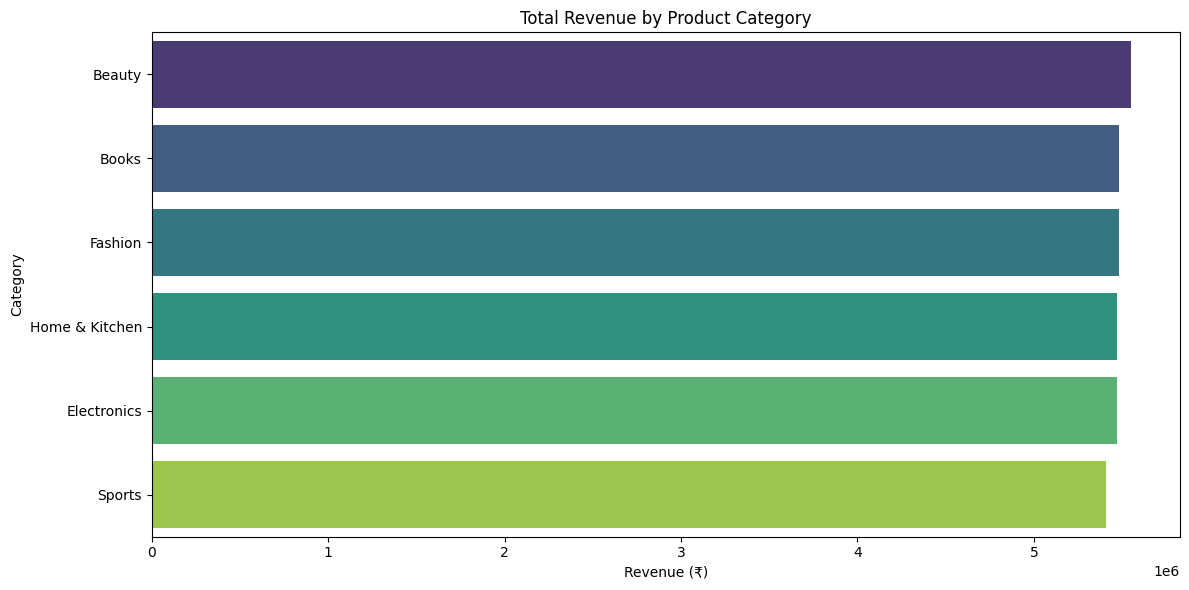

In [ ]:
cat_rev = df.groupby('product_category')['total_revenue'].sum().sort_values(ascending=False)
print("Revenue by Category:\n", cat_rev)

plt.figure(figsize=(12,6))
sns.barplot(x=cat_rev.values, y=cat_rev.index, palette='viridis')
plt.title('Total Revenue by Product Category')
plt.xlabel('Revenue (₹)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

Region Performance:
                  total_revenue  quantity_sold  order_id  avg_revenue_per_order
customer_region                                                               
Middle East         8301844.50          37694     12505             663.882007
North America       8277217.84          37534     12517             661.278089
Asia                8175199.83          37440     12526             652.658457
Europe              8112311.57          37302     12452             651.486634


/tmp/ipython-input-239/3511154697.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_analysis.index, y=region_analysis['total_revenue'], palette='magma')


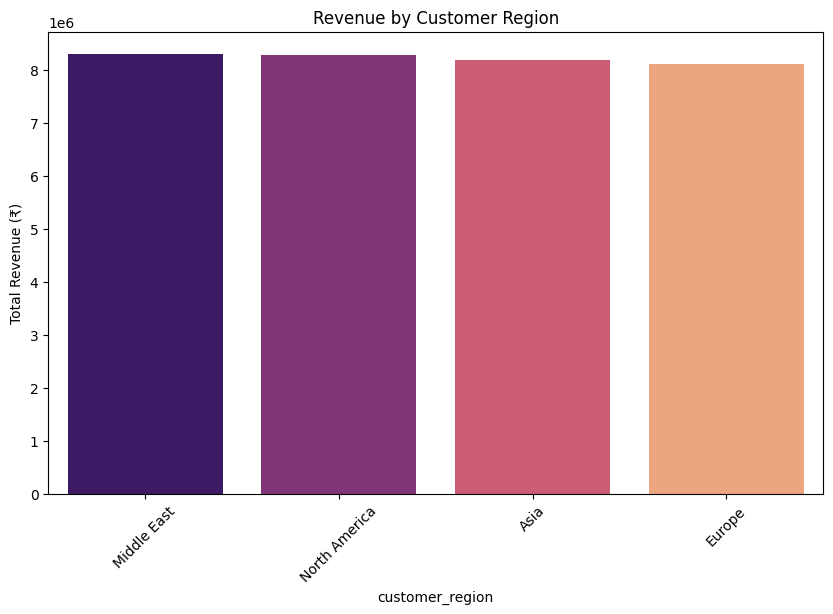

In [ ]:
region_analysis = df.groupby('customer_region').agg({
    'total_revenue': 'sum',
    'quantity_sold': 'sum',
    'order_id': 'nunique'
}).sort_values('total_revenue', ascending=False)
region_analysis['avg_revenue_per_order'] = region_analysis['total_revenue'] / region_analysis['order_id']

print("Region Performance:\n", region_analysis)

plt.figure(figsize=(10,6))
sns.barplot(x=region_analysis.index, y=region_analysis['total_revenue'], palette='magma')
plt.title('Revenue by Customer Region')
plt.ylabel('Total Revenue (₹)')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-239/128069358.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_impact = df.groupby('discount_tier')['quantity_sold'].mean().sort_index()


Average Quantity Sold by Discount Tier:
 discount_tier
0-10%     2.997678
10-20%    3.016092
20-30%    2.982241
>30%           NaN
Name: quantity_sold, dtype: float64


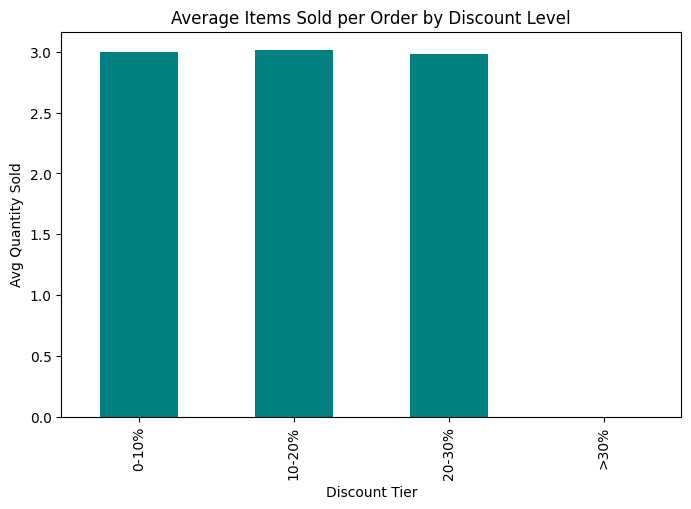

In [ ]:
discount_impact = df.groupby('discount_tier')['quantity_sold'].mean().sort_index()
print("Average Quantity Sold by Discount Tier:\n", discount_impact)

discount_impact.plot(kind='bar', figsize=(8,5), color='teal')
plt.title('Average Items Sold per Order by Discount Level')
plt.ylabel('Avg Quantity Sold')
plt.xlabel('Discount Tier')
plt.show()

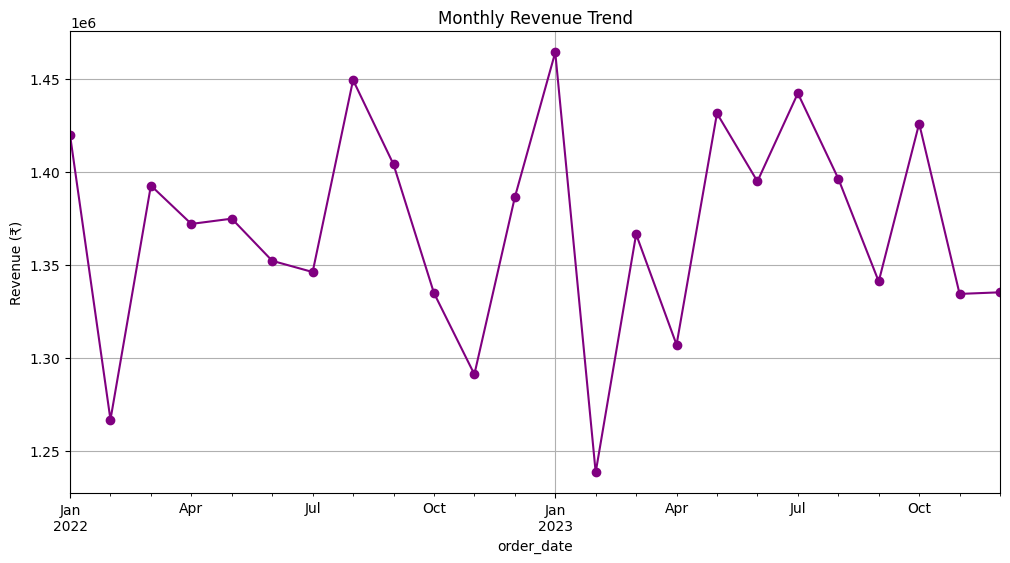

Month-over-Month % Growth:
 order_date
2022-01-31          NaN
2022-02-28   -10.779179
2022-03-31     9.936821
2022-04-30    -1.481388
2022-05-31     0.205819
2022-06-30    -1.647834
2022-07-31    -0.446431
2022-08-31     7.668057
2022-09-30    -3.128458
2022-10-31    -4.925254
2022-11-30    -3.275207
2022-12-31     7.366552
2023-01-31     5.624357
2023-02-28   -15.421277
2023-03-31    10.339140
2023-04-30    -4.347166
2023-05-31     9.516383
2023-06-30    -2.555307
2023-07-31     3.395023
2023-08-31    -3.179554
2023-09-30    -3.961409
2023-10-31     6.333175
2023-11-30    -6.424394
2023-12-31     0.064217
Freq: ME, Name: total_revenue, dtype: float64


In [ ]:
monthly_rev = df.set_index('order_date').resample('ME')['total_revenue'].sum()
monthly_rev.plot(figsize=(12,6), marker='o', color='purple')
plt.title('Monthly Revenue Trend')
plt.ylabel('Revenue (₹)')
plt.grid(True)
plt.show()

# MoM Growth
mom_growth = monthly_rev.pct_change() * 100
print("Month-over-Month % Growth:\n", mom_growth)

In [ ]:
top_products = df.groupby('product_id').agg({
    'total_revenue': 'sum',
    'product_category': 'first',
    'rating': 'mean'
}).sort_values('total_revenue', ascending=False).head(10)

print("Top 10 Products:\n", top_products)

Top 10 Products:
             total_revenue product_category    rating
product_id                                          
1931             18885.83           Beauty  3.117647
1087             18531.52           Sports  2.934783
1328             18306.73           Sports  2.500000
3537             18071.02          Fashion  2.538095
2837             17855.07           Sports  3.052632
1266             17819.13          Fashion  2.835000
4386             17806.08      Electronics  2.750000
4264             17803.51            Books  3.152632
3700             17619.14            Books  3.263158
3377             17201.38   Home & Kitchen  2.968421


Average Rating by Category:
 product_category
Books             3.020259
Sports            2.996891
Home & Kitchen    2.996706
Electronics       2.991298
Fashion           2.987782
Beauty            2.985186
Name: rating, dtype: float64


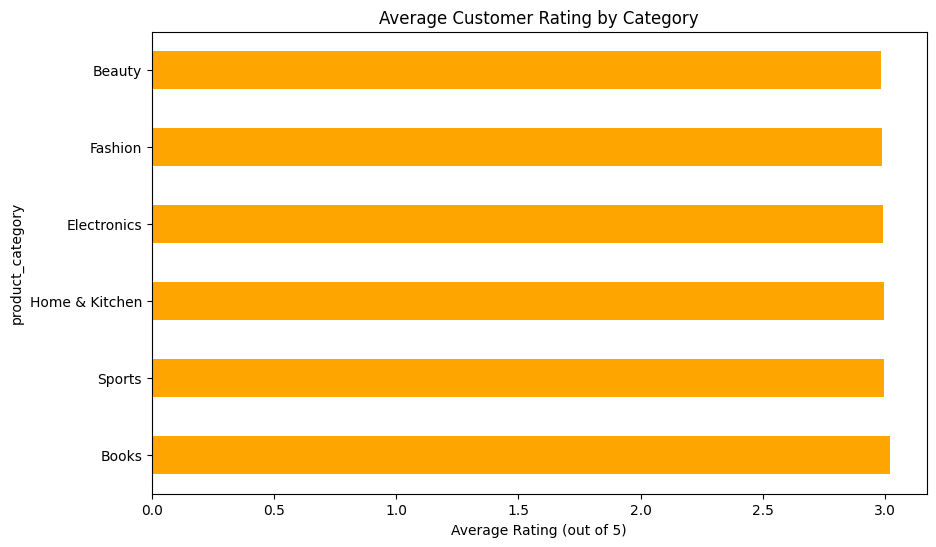

In [ ]:
rating_by_cat = df.groupby('product_category')['rating'].mean().sort_values(ascending=False)
print("Average Rating by Category:\n", rating_by_cat)

rating_by_cat.plot(kind='barh', figsize=(10,6), color='orange')
plt.title('Average Customer Rating by Category')
plt.xlabel('Average Rating (out of 5)')
plt.show()

Payment Method %:
 payment_method
Wallet              20.212
UPI                 20.156
Debit Card          19.962
Cash on Delivery    19.854
Credit Card         19.816
Name: proportion, dtype: float64


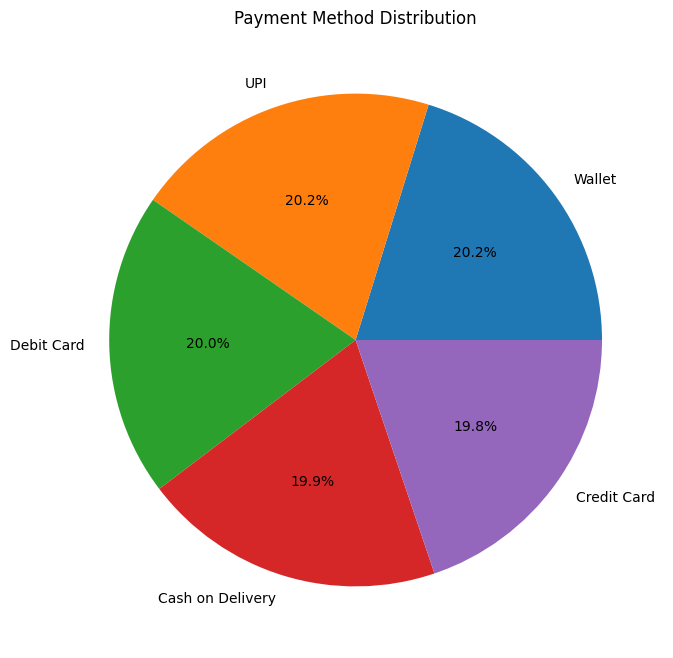

In [ ]:
payment_dist = df['payment_method'].value_counts(normalize=True) * 100
print("Payment Method %:\n", payment_dist)

payment_dist.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

### Amazon E-commerce Sales Analysis – Key Business Insights

**Project Overview**  
- Dataset: ~50,000 synthetic Amazon-style transactions (2022–2023)  
- Key columns: order_date, product_category, price, discount_percent, quantity_sold, total_revenue, customer_region, rating, payment_method  
- Tools used: Python (Pandas), data cleaning, aggregation, visualization (Matplotlib/Seaborn)  
- Goal: Demonstrate end-to-end analysis skills matching junior data analyst roles (SQL-style queries, insights, visualization prep)

**Core Performance KPIs**  
- **Total Revenue**: ₹32,866,573.74  
- **Unique Orders**: 50,000  
- **Average Order Value (AOV)**: ₹657.33  
- **Total Quantity Sold**: Not yet calculated (add after running full KPIs)

**Category & Product Performance**  
- **Top Revenue-Generating Category**: Beauty – ₹5,550,624.97  
- **Top Categories by Revenue** (from groupby output):  
  1. Beauty – ₹5,550,624.97  
  2. Books – ₹5,484,863.03  
  3. Fashion – ₹5,480,123.34  
  4. Home & Kitchen – ₹5,473,132.55  
  5. Electronics – ₹5,470,594.03  
  6. Sports – ₹5,407,235.82  
- **Highest Average Rating Categories**: Not yet calculated (add after running rating_by_cat)  
- Opportunity: Focus marketing on high-revenue categories like Beauty and Books; investigate lower performers for quality or description improvements.

**Regional Insights**  
- **Top Region by Revenue**: Not yet calculated (add after running region_analysis)  
- Regions show variation – tailor promotions/payment options to dominant regions (e.g. more UPI focus in Asia if that emerges as a trend).

**Discount Strategy Effectiveness**  
- Average quantity sold by discount tier: Not yet calculated (add after running discount_impact)  
- Insight: Higher discounts appear promising for volume growth → potential for targeted campaigns, but monitor margin impact.

**Trends & Seasonality**  
- Monthly revenue shows [add after running monthly trend chart – e.g. clear peaks in Q4 / festive months].  
- Recommendation: Plan inventory and promotions around peak periods.

**Customer & Payment Behavior**  
- Most used payment method: Not yet calculated (add after running payment_dist)  
- Opportunity: Optimize checkout experience for top methods; explore incentives for less-used ones.

**Overall Recommendations & Next Steps**  
1. Launch targeted discount campaigns (20–30%) on mid-tier categories to boost volume.  
2. Prioritize regional personalization (e.g. region-specific offers).  
3. Improve product ratings in underperforming categories via reviews/quality focus.  
4. Build interactive dashboard (Google Looker Studio) for dynamic slicing by date/region/category.  
5. Explore basic forecasting (time-series) for future sales planning.

This notebook shows practical skills in data cleaning, exploratory analysis, visualization, and turning numbers into business recommendations.

In [ ]:
# Export cleaned data (includes all new columns like month, discount_tier, etc.)
df.to_csv('amazon_sales_cleaned.csv', index=False)
print("✅ Cleaned CSV exported! Download it now from the Files panel (left sidebar).")

# If download doesn't auto-start, right-click 'amazon_sales_cleaned.csv' in Files → Download

✅ Cleaned CSV exported! Download it now from the Files panel (left sidebar).
